In [1]:
# boilerplate cell for stuff that comes out of the box with R, probably
# copied from https://github.com/Azure/RNNForTimeSeriesForecasting, because I am new to this stuff
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import statsmodels.stats.api as sms
from glob import glob
from collections import UserDict
from IPython.display import Image, Markdown, display
from utils import Capturing
%matplotlib inline

# some kind soul ported a bunch of default R datasets (and more) into python, bless his soul
from pydataset import data as pdsd

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)

Original:
```R
help(trees)
```

In [2]:
with Capturing() as output:
    pdsd("trees",show_doc=True)
display(Markdown("\n".join(output)))

trees

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Girth, Height and Volume for Black Cherry Trees

### Description

This data set provides measurements of the girth, height and volume of timber
in 31 felled black cherry trees. Note that girth is the diameter of the tree
(in inches) measured at 4 ft 6 in above the ground.

### Usage

    trees

### Format

A data frame with 31 observations on 3 variables.

`[,1]`

`Girth`

numeric

Tree diameter in inches

`[,2]`

`Height`

numeric

Height in ft

`[,3]`

`Volume`

numeric

Volume of timber in cubic ft

### Source

Ryan, T. A., Joiner, B. L. and Ryan, B. F. (1976) _The Minitab Student
Handbook_. Duxbury Press.

### References

Atkinson, A. C. (1985) _Plots, Transformations and Regression_. Oxford
University Press.

### Examples

    require(stats); require(graphics)
    pairs(trees, panel = panel.smooth, main = "trees data")
    plot(Volume ~ Girth, data = trees, log = "xy")
    coplot(log(Volume) ~ log(Girth) | Height, data = trees,
           panel = panel.smooth)
    summary(fm1 <- lm(log(Volume) ~ log(Girth), data = trees))
    summary(fm2 <- update(fm1, ~ . + log(Height), data = trees))
    step(fm2)
    ## i.e., Volume ~= c * Height * Girth^2  seems reasonable



In [3]:
trees = pdsd("trees")
trees

,Girth,Height,Volume
1,8.30,70,10.30
2,8.60,65,10.30
3,8.80,63,10.20
4,10.50,72,16.40
5,10.70,81,18.80
6,10.80,83,19.70
7,11.00,66,15.60
8,11.00,75,18.20
9,11.10,80,22.60
10,11.20,75,19.90


Original:
```R
pairs(trees, pch = 21, bg = c("red"))
```

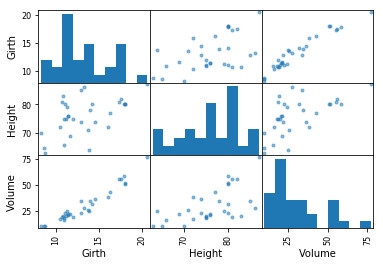

In [4]:
pd.tools.plotting.scatter_matrix(trees)
plt.show()

Original:
```R
cov(trees)
```

In [5]:
trees.cov()

,Girth,Height,Volume
Girth,9.85,10.38,49.89
Height,10.38,40.60,62.66
Volume,49.89,62.66,270.20


Original:
```R
cor(trees)
```

In [6]:
trees.corr()

,Girth,Height,Volume
Girth,1.00,0.52,0.97
Height,0.52,1.00,0.60
Volume,0.97,0.60,1.00
